# This is the midterm assignment on NIKE 
# Used twitter to get the data 

In [28]:
pip install emoji



  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234913 sha256=bce2ffe68bb22e05051172e790d4d67475549da80e6807f907f6358182e89cea
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\86\62\9e\a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [12]:
pip install numpy upgraded

ERROR: Could not find a version that satisfies the requirement upgraded (from versions: none)
ERROR: No matching distribution found for upgraded


In [1]:
# import required libraries
import tweepy
import pandas as pd
from textblob import TextBlob
import time
#cleaning the data
import string
import re

# Authentication
consumerKey = "smnegPeIOBfdnaDBZNmU0qLPo"
consumerSecret = "yVlbDlnDP6f3oC0Z94yY3ZHRnqH2piAxRQLKTst3jgsHXrdZuz"
accessToken = "1246515307390230528-2yIYcHhAYUTI2zwAdUTE9OX4IWKfPl"
accessTokenSecret = "2ETXWWxdRgMq0oad68Z98Njy63ObXKRqtEZmJ9MhekFga"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#defining a method to analysze data
def clean_tweet_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Sentiment Analysis function
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# User inputs
keyword = input("Please enter keyword or hashtag to search:")
noOfTweet = int(input("Please enter how many tweets to analyze:"))

# Create a list of dictionaries to store the tweets' information
tweets = []
for tweet in tweepy.Cursor(api.search_tweets, q=keyword, lang="en").items(noOfTweet):
    try:
        tweet_dict = {}
        tweet_dict['Created At'] = tweet.created_at
        tweet_dict['Tweet Text'] = tweet.text
        tweet_dict['Sentiment'] = get_sentiment(tweet.text)
        tweets.append(tweet_dict)
    except tweepy.TweepError:
        print("Error occurred, waiting for 15 minutes...")
        time.sleep(15 * 60)

# Create a pandas dataframe to store and manipulate the data
df = pd.DataFrame(tweets)

# Print the sentiment value counts
print(df['Sentiment'].value_counts())

# Save the dataframe to a csv file
df.to_csv('tweets.csv', index=False)


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Please enter keyword or hashtag to search:nike
Please enter how many tweets to analyze:30
Sentiment
Neutral     16
Positive    11
Negative     3
Name: count, dtype: int64


In [2]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,@Bonisile_RMS He's wearing Adidas today. Nike ...,Neutral
1,2023-04-15 12:33:04+00:00,@shepardmark365 @DHIGGINS129 @Carmen1969AM @Lo...,Positive
2,2023-04-15 12:33:04+00:00,RT @__cypher: Nike Air Jordan 1 x Cypher\nFeat...,Positive
3,2023-04-15 12:32:59+00:00,RT @MeanGreenSports: 🖋️ UNT inks three-year ex...,Neutral
4,2023-04-15 12:32:58+00:00,AD: Dropped via Nike US\nNEW Jordan Nu Retro 1...,Positive


In [3]:
# Remove special characters
df['Tweet Text'] = df['Tweet Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))



In [4]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,BonisileRMS Hes wearing Adidas today Nike wont...,Neutral
1,2023-04-15 12:33:04+00:00,shepardmark365 DHIGGINS129 Carmen1969AM LouDob...,Positive
2,2023-04-15 12:33:04+00:00,RT cypher Nike Air Jordan 1 x Cypher\nFeatures...,Positive
3,2023-04-15 12:32:59+00:00,RT MeanGreenSports 🖋️ UNT inks threeyear exten...,Neutral
4,2023-04-15 12:32:58+00:00,AD Dropped via Nike US\nNEW Jordan Nu Retro 1 ...,Positive


In [9]:
#removing emojis
import re
import emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Tweet Text'] = df['Tweet Text'].apply(remove_emoji)


In [10]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,BonisileRMS Hes wearing Adidas today Nike wont...,Neutral
1,2023-04-15 12:33:04+00:00,shepardmark365 DHIGGINS129 Carmen1969AM LouDob...,Positive
2,2023-04-15 12:33:04+00:00,RT cypher Nike Air Jordan 1 x Cypher\nFeatures...,Positive
3,2023-04-15 12:32:59+00:00,RT MeanGreenSports ️ UNT inks threeyear extens...,Neutral
4,2023-04-15 12:32:58+00:00,AD Dropped via Nike US\nNEW Jordan Nu Retro 1 ...,Positive


In [11]:
#convert to lowercase
df['Tweet Text'] = df['Tweet Text'].str.lower()


In [12]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,bonisilerms hes wearing adidas today nike wont...,Neutral
1,2023-04-15 12:33:04+00:00,shepardmark365 dhiggins129 carmen1969am loudob...,Positive
2,2023-04-15 12:33:04+00:00,rt cypher nike air jordan 1 x cypher\nfeatures...,Positive
3,2023-04-15 12:32:59+00:00,rt meangreensports ️ unt inks threeyear extens...,Neutral
4,2023-04-15 12:32:58+00:00,ad dropped via nike us\nnew jordan nu retro 1 ...,Positive


In [13]:
#tokenize text
import nltk
nltk.download('punkt')

df['Tweet Text'] = df['Tweet Text'].apply(lambda x: nltk.word_tokenize(x.lower()))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,"[bonisilerms, hes, wearing, adidas, today, nik...",Neutral
1,2023-04-15 12:33:04+00:00,"[shepardmark365, dhiggins129, carmen1969am, lo...",Positive
2,2023-04-15 12:33:04+00:00,"[rt, cypher, nike, air, jordan, 1, x, cypher, ...",Positive
3,2023-04-15 12:32:59+00:00,"[rt, meangreensports, ️, unt, inks, threeyear,...",Neutral
4,2023-04-15 12:32:58+00:00,"[ad, dropped, via, nike, us, new, jordan, nu, ...",Positive


In [18]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Tweet Text'] = df['Tweet Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,"[bonisilerms, hes, wearing, adidas, today, nik...",Neutral
1,2023-04-15 12:33:04+00:00,"[shepardmark365, dhiggins129, carmen1969am, lo...",Positive
2,2023-04-15 12:33:04+00:00,"[rt, cypher, nike, air, jordan, 1, x, cypher, ...",Positive
3,2023-04-15 12:32:59+00:00,"[rt, meangreensports, ️, unt, inks, threeyear,...",Neutral
4,2023-04-15 12:32:58+00:00,"[ad, dropped, via, nike, us, new, jordan, nu, ...",Positive


In [33]:
#change to paragraph to check the data
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv('tweets.csv')

# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert emojis to text
    text = emoji.demojize(text)
    # Remove emoji characters
    text = re.sub(r':[a-z_]+:', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Apply text preprocessing to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(preprocess_text)

# Concatenate tweet text column into a single paragraph
paragraph = ' '.join(df['Tweet Text'].tolist())
print(paragraph)


hes wearing adidas today nike wont happy stand values doesnt matter much like somethin rt nike air jordan x cypher features hidden usb c charging port minutes full super fast charging full charge lasts rt unt inks threeyear extension ad dropped via nike us new jordan nu retro low blackyellowwhite men gs rt another image jimin gdragons peaceminusone x nike kwondo family dinner tae hoon lee marketing director rt trolling women appointing dylan mulvaney female ambassador prance around like lunatic b rt nike dunk olives rt outfit rt another image jimin gdragons peaceminusone x nike kwondo family dinner tae hoon lee marketing director call nike say need one skint always likes excuse post favourite book amp rt ad nike air force jackie robinson live ptam et snkrs us gt rt ad jackie robinson x nike baseball collection live ptam et cleats graphic jersey rt available via nike us nike air max penny pure platinum gt rt rapper milli wearing x kwondo bampw shoes performance rolling loud event rt kee

In [34]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,hes wearing adidas today nike wont happy,Neutral
1,2023-04-15 12:33:04+00:00,stand values doesnt matter much like somethin,Positive
2,2023-04-15 12:33:04+00:00,rt nike air jordan x cypher features hidden us...,Positive
3,2023-04-15 12:32:59+00:00,rt unt inks threeyear extension,Neutral
4,2023-04-15 12:32:58+00:00,ad dropped via nike us new jordan nu retro low...,Positive


In [35]:
#stem the data
from nltk.stem import PorterStemmer

# Define function to apply Porter stemming to a string
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

# Apply Porter stemming to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(stem_text)


In [38]:
# Display a sample of the stemmed data
print(df['Tweet Text'].sample(10))


28    rt mina tanaka footbal player part japan women...
1           stand valu doesnt matter much like somethin
24         mayb help explain mulvaney period late abt u
0                   he wear adida today nike wont happi
13    rt ad jacki robinson x nike basebal collect li...
19    rt nike air forc jacki robinson releas tomorro...
5     rt anoth imag jimin gdragon peaceminuson x nik...
4     ad drop via nike us new jordan nu retro low bl...
27               ye left alon let ever shrink group sel
16    rt keep chin crown doesnt slip nike air vomero...
Name: Tweet Text, dtype: object


In [40]:
#lemetized text
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download WordNet lemmatizer
import nltk
nltk.download('wordnet')

df = pd.read_csv('tweets.csv')

# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
     # Convert emojis to text
    text = emoji.demojize(text)
    # Remove emoji characters
    text = re.sub(r':[a-z_]+:', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Apply text preprocessing to tweet text column
df['Tweet Text'] = df['Tweet Text'].apply(preprocess_text)

# Display a sample of the lemmatized data
print(df['Tweet Text'].sample(10))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


8                                             rt outfit
16    rt keep chin crown doesnt slip nike air vomero...
21    rt who mass reporting always appreciated voice...
0               he wearing adidas today nike wont happy
24        maybe help explain mulvaney period late abt u
19    rt nike air force jackie robinson release tomo...
13    rt ad jackie robinson x nike baseball collecti...
29                   speeche ② kiiiondo dinner tokyo ig
3                        rt unt ink threeyear extension
26    nfl lost billion nike lost billion ab lost bil...
Name: Tweet Text, dtype: object


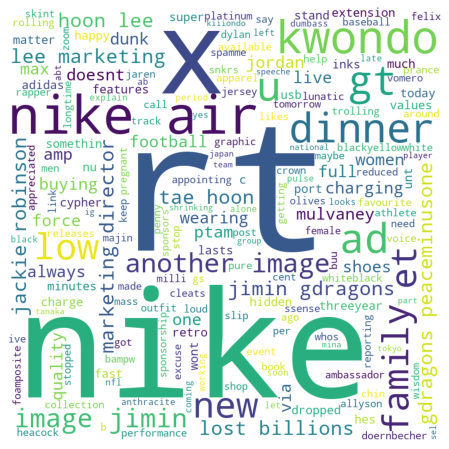

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from processed text data
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(paragraph)

# Display the generated wordcloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [42]:
df.to_csv('cleaned_data.csv', index=False)


In [43]:
df.head()

,Created At,Tweet Text,Sentiment
0,2023-04-15 12:33:04+00:00,he wearing adidas today nike wont happy,Neutral
1,2023-04-15 12:33:04+00:00,stand value doesnt matter much like somethin,Positive
2,2023-04-15 12:33:04+00:00,rt nike air jordan x cypher feature hidden usb...,Positive
3,2023-04-15 12:32:59+00:00,rt unt ink threeyear extension,Neutral
4,2023-04-15 12:32:58+00:00,ad dropped via nike u new jordan nu retro low ...,Positive
